In [1]:
import pandas as pd
import numpy as np
from typing import List
from sekigo.dataAnalysis.gamingDownloadDataFrameProcessor import GamingDownloadDataFrameProcessor
from sekigo.dataAnalysis.baseDataFrameProcessor import BaseDataFrameProcessor
from sekigo.dataAnalysis.softwareUpdateDataProcessor import SoftwareUpdateDataProcessor
from sekigo.dataAnalysis.dataFrameExtractor import DataFrameExtractor
from sekigo.core.flowRepresentation import FlowRepresentation
from sekigo.core.featureExtractor import FeatureExtractor
import matplotlib.pyplot as plt
import sklearn

In [2]:
data_processor_1 = SoftwareUpdateDataProcessor(parquet_path= "./data/software-update-1w.parquet")
data_processor_2 = SoftwareUpdateDataProcessor(parquet_path= "./data/software-update-flowprint.parquet")
data_processor_3 = GamingDownloadDataFrameProcessor(parquet_path= "./data/2023-12-01--2023-12-31--flowprint.parquet")

initial software update length = 72826
final software update length = 36790
initial software update length = 8046
final software update length = 4967


In [12]:
data  : List[FlowRepresentation] = DataFrameExtractor.getData(data_frame_processors= [data_processor_1,data_processor_2,data_processor_3], use_balancer= True, start_with_invalid_points= False)

{'Video': 1.0, 'Download': 1.1581531240271092, 'Conferencing': 2.883952531456855}


In [13]:
len(data)

133306

In [14]:
X = FeatureExtractor.extractFeaturesFromFlowList(data)
y = list(map(lambda x : x.class_type,data))

In [15]:
data = list(map(lambda x : x.__dict__, data))

In [16]:
FeatureExtractor.feature_to_index_map

{'sparcity_u_0': 0,
 'sparcity_u_1': 1,
 'sparcity_u_2': 2,
 'sparcity_d_0': 3,
 'sparcity_d_1': 4,
 'sparcity_d_2': 5,
 'non_zero_mean_u_pl_0': 6,
 'non_zero_mean_u_pl_1': 7,
 'non_zero_mean_u_pl_2': 8,
 'non_zero_mean_d_pl_0': 9,
 'non_zero_mean_d_pl_1': 10,
 'non_zero_mean_d_pl_2': 11,
 'non_zero_var_u_pl_0': 12,
 'non_zero_var_u_pl_1': 13,
 'non_zero_var_u_pl_2': 14,
 'non_zero_var_d_pl_0': 15,
 'non_zero_var_d_pl_1': 16,
 'non_zero_var_d_pl_2': 17,
 'change_count_u_0': 18,
 'change_count_u_1': 19,
 'change_count_u_2': 20,
 'change_count_d_0': 21,
 'change_count_d_1': 22,
 'change_count_d_2': 23,
 'fraction_per_band_u_b_0': 24,
 'fraction_per_band_u_b_1': 25,
 'fraction_per_band_u_b_2': 26,
 'fraction_per_band_d_b_0': 27,
 'fraction_per_band_d_b_1': 28,
 'fraction_per_band_d_b_2': 29,
 'fraction_per_band_u_p_0': 30,
 'fraction_per_band_u_p_1': 31,
 'fraction_per_band_u_p_2': 32,
 'fraction_per_band_d_p_0': 33,
 'fraction_per_band_d_p_1': 34,
 'fraction_per_band_d_p_2': 35}

In [17]:
for i in range(len(data)):
    data[i]["change_count_d_2"] = X[i][FeatureExtractor.feature_to_index_map["change_count_d_2"]]
    data[i]["change_count_d_1"] = X[i][FeatureExtractor.feature_to_index_map["change_count_d_1"]]
    data[i]["sparcity_d_2"] = X[i][FeatureExtractor.feature_to_index_map["sparcity_d_2"]]
    

In [18]:
df = pd.DataFrame(data)
#df = df[((df.class_type == "Video") | (df.class_type == "Gaming Download"))]

In [19]:
df.class_type.value_counts()

class_type
Conferencing    47895
Download        47685
Video           37726
Name: count, dtype: int64

In [20]:
df.sparcity_d_2.describe()

count    133306.000000
mean          0.630040
std           0.442793
min           0.000000
25%           0.000000
50%           0.900000
75%           1.000000
max           1.000000
Name: sparcity_d_2, dtype: float64

In [21]:
df[df.class_type == "Download"].sparcity_d_2.describe() 

count    47685.000000
mean         0.081127
std          0.225433
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sparcity_d_2, dtype: float64

In [22]:
df[df.class_type == "Video"].sparcity_d_2.describe() 

count    37726.000000
mean         0.859628
std          0.145561
min          0.000000
25%          0.800000
50%          0.900000
75%          0.966667
max          1.000000
Name: sparcity_d_2, dtype: float64

In [23]:
np.set_printoptions(suppress=True)

In [24]:
row = df[(df.class_type == "Download")].reindex().sample(1).iloc[0]
print(row.up_bytes)
print("*******************")
print(row.down_bytes)
print("******************")
print(row.provider_type, row.down_bps, row.sni)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
*******************
[[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
      0.     0.     0.     0.     0.     0.     0.     0.     0.     0.]
 [    0. 69888.     0.     0.  1456. 26208.  8736. 27664.     0.  8736.
   1456. 24752. 14560.     0.     0.  8736. 17472.     0.     0.     0.
      0.     0.     0.     0.     0.  4368.  4368. 20384. 11648.     0.]]
******************
Apple iOSAppStore 13439

In [25]:
row = df[(df.class_type == "Video")].reindex().sample(1).iloc[0]
print(row.up_bytes)
print("*******************")
print(row.down_bytes)
print("******************")
print(row.provider_type, row.down_bps, row.sni)

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. 1005.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0. 2005.
     0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]]
*******************
[[     0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.]
 [     0.      0.      0.      0.    494.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.    

In [26]:
df[(df.class_type == "Download")].sni.value_counts()

sni
Apple iOSAppStore    47685
Name: count, dtype: int64

In [27]:
df[(df.class_type == "Download") & (df.sparcity_d_2 > .8)].sni.value_counts()

sni
Apple iOSAppStore    2080
Name: count, dtype: int64

In [28]:
row = df[(df.class_type == "Video") & (df.sparcity_d_2 < .3)].reindex().iloc[5]
print(row.down_bytes)


[[   245.      0.    163.      0.     26.    189.     79.    260.     26.
       0.      0.      0.    217.      0.      0.    163.      0.     26.
     189.    122.    245.      0.    189.    270.     27.     26.      0.
       0.      0.    329.]
 [   432.      0.    587.      0.      0.      0.      0.    792.      0.
       0.      0.      0.    375.      0.      0.    871.      0.    718.
     785.    172.      0.      0.    629.    164.      0.    850.      0.
       0.      0.      0.]
 [462492. 392500. 551246. 487500. 701186. 902496. 682500. 514989. 786250.
  748750. 404995. 597500. 659996. 738750. 902500. 651246. 700000. 571233.
  711239.  77500. 312496. 582500. 652496. 547489. 305000. 303750.      0.
       0.      0.      0.]]


(array([  210.,    31.,    34.,    28.,    25.,    38.,    24.,    54.,
           72.,    47.,    65.,    88.,   101.,    98.,   144.,   158.,
          210.,   271.,   364.,   482.,   648.,   893.,  1214.,  1785.,
         2537.,  2896.,  3537.,  4567.,  6286., 10819.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

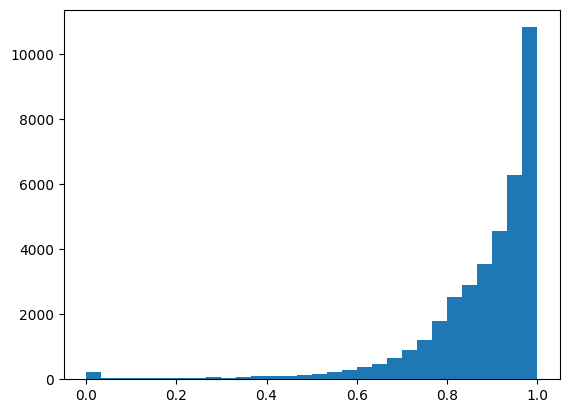

In [29]:
video_df = df[(df.class_type == "Video")]
video_df_sparcity_d_2 = video_df.sparcity_d_2.values
plt.hist(video_df_sparcity_d_2,bins= 30)

(array([37602.,  2595.,   651.,   522.,   380.,   321.,   285.,   275.,
          246.,   252.,   234.,   195.,   205.,   153.,   159.,   178.,
          128.,   145.,   142.,   122.,   155.,   150.,   169.,   169.,
          172.,   128.,   151.,   242.,   580.,   979.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

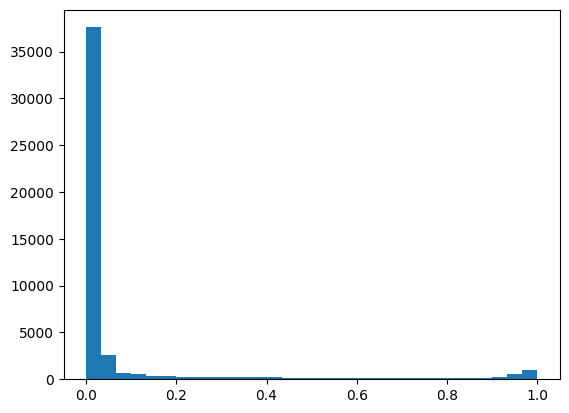

In [32]:
gaming_df = df[(df.class_type == "Download")]
gaming_df_sparcity_d_2 = gaming_df.sparcity_d_2.values
plt.hist(gaming_df_sparcity_d_2, bins= 30)

In [32]:
df.sparcity_d_2.corr(df.down_bps)

-0.4095730050621216

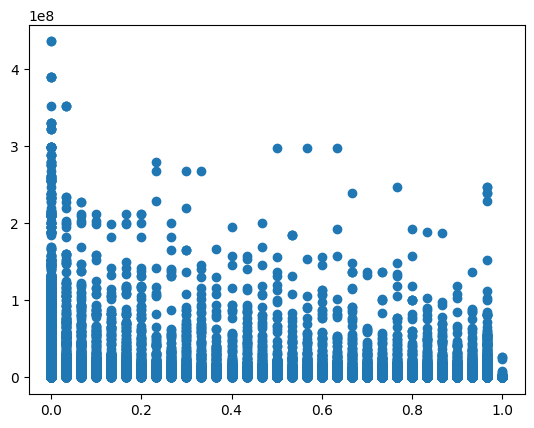

In [33]:
plt.scatter(gaming_df.sparcity_d_2, gaming_df.down_bps)

In [42]:
gaming_df[(gaming_df.sparcity_d_2 > .8)].down_bps.describe()

count    1.390000e+04
mean     1.842828e+06
std      8.603366e+06
min      7.726829e+01
25%      1.739092e+04
50%      5.951160e+04
75%      4.387403e+05
max      2.466616e+08
Name: down_bps, dtype: float64

In [43]:
video_df.sparcity_d_2.describe()

count    136923.000000
mean          0.883525
std           0.133372
min           0.000000
25%           0.833333
50%           0.933333
75%           0.966667
max           1.000000
Name: sparcity_d_2, dtype: float64

In [ ]:
# chug out gaming download and video with zero download bytes ?
# Does gaming does download in band 1 as well ?

In [71]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [63]:
kmeans.fit(np.array(df.features.values.tolist()))
clusters = kmeans.labels_

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(, clusters))